In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
data = pd.read_csv('/content/train_dataset.csv')

In [ ]:
data.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction
0,35,971,3,4,5,4,2,3,3,2,...,373,358,0,1,1,0,0,1,0,neutral or dissatisfied
1,32,1092,0,0,0,3,1,0,1,1,...,0,0,0,1,1,0,0,1,0,satisfied
2,46,2915,0,5,0,5,3,4,5,1,...,0,0,1,0,1,0,1,0,0,satisfied
3,56,2556,4,4,4,4,4,4,4,3,...,19,18,0,1,1,0,1,0,0,satisfied
4,54,468,1,4,1,4,4,1,4,4,...,0,0,0,1,0,1,0,1,0,neutral or dissatisfied


In [ ]:
data["satisfaction"]=data["satisfaction"].apply({"neutral or dissatisfied":0,"satisfied":1}.get)

In [ ]:
df=data.head()

In [47]:
df.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction
0,35,971,3,4,5,4,2,3,3,2,...,373,358,0,1,1,0,0,1,0,0
1,32,1092,0,0,0,3,1,0,1,1,...,0,0,0,1,1,0,0,1,0,1
2,46,2915,0,5,0,5,3,4,5,1,...,0,0,1,0,1,0,1,0,0,1
3,56,2556,4,4,4,4,4,4,4,3,...,19,18,0,1,1,0,1,0,0,1
4,54,468,1,4,1,4,4,1,4,4,...,0,0,0,1,0,1,0,1,0,0


In [ ]:
x=df.drop(["satisfaction"],axis=1)
y=df[["satisfaction"]]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [ ]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [ ]:
regression.fit(x_train,y_train)

LinearRegression()

In [ ]:
lin_Predication=regression.predict(x_test)

In [ ]:
regression.score(x,y)

0.2114956975354162

Q1. Creating a pie chart derive the contributions of  'Food and drink',  'Online boarding',  'Seat comfort' and  'Inflight entertainment' features in providing satisfactory services for the first 3 passengers from the aviation industry.

In [15]:
aviation_passengers = df[(df['Type of Travel_Business travel'] == 1) & (df['Type of Travel_Personal Travel'] == 0)].head(3)

In [16]:
food_and_drink_total = aviation_passengers['Food and drink'].sum()
online_boarding_total = aviation_passengers['Online boarding'].sum()
seat_comfort_total = aviation_passengers['Seat comfort'].sum()
inflight_entertainment_total = aviation_passengers['Inflight entertainment'].sum()

In [17]:
# Create a pie chart
labels = ['Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment']
totals = [food_and_drink_total, online_boarding_total, seat_comfort_total, inflight_entertainment_total]
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen']

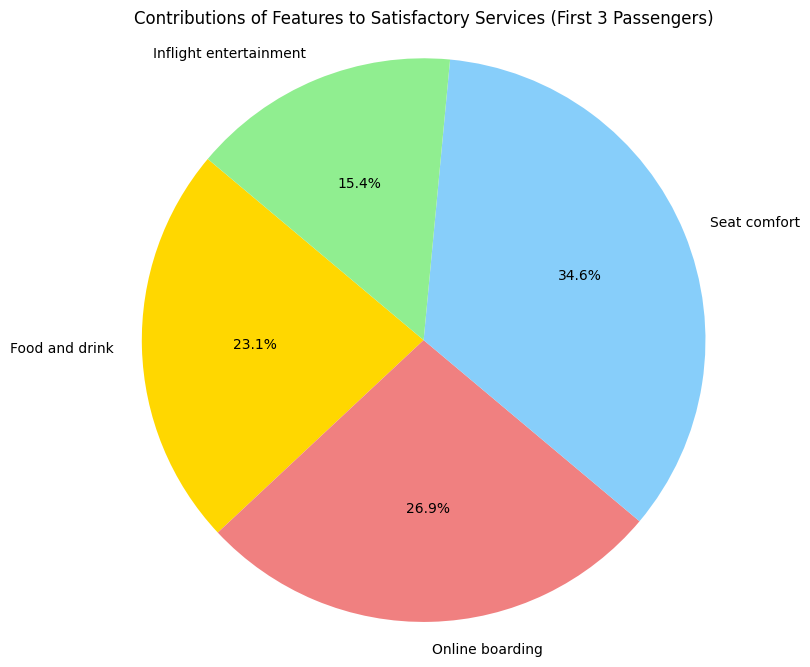

In [18]:
plt.figure(figsize=(8, 8))
plt.pie(totals, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Contributions of Features to Satisfactory Services (First 3 Passengers)')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

Q2. Considering the first 6 passengers, compute how many of them were satisfied with the airline services after taking a business travel

In [19]:
# Filter the first 6 passengers
first_6_passengers = df.head(6)

In [20]:
# Count the number of passengers who were satisfied (satisfaction == 1) and took a business trip
satisfied_business_travelers = first_6_passengers[(first_6_passengers['satisfaction'] == 1) & (first_6_passengers['Type of Travel_Business travel'] == 1)]

In [21]:
# Get the count of satisfied business travelers
count_satisfied_business_travelers = len(satisfied_business_travelers)


In [22]:
print(f"Number of satisfied passengers after taking a business travel among the first 6: {count_satisfied_business_travelers}")


Number of satisfied passengers after taking a business travel among the first 6: 3


Q3. Nowadays e-ticket or online flight tickets have replaced the print ones. Passengers and airline company makes a contract through e-tickets. In this context derive intuition from the dataset for the first 20 passengers as to how age, gender and class of flight(business/economy) are related.

It will help you to understand which age group of passengers boarding which class of flight are more comfortable in booking tickets online

In [23]:
# Filter the first 20 passengers
first_20_passengers = df.head(20)

In [24]:
# Group the data by gender and flight class and calculate the average age
grouped_data = first_20_passengers.groupby(['Gender_Male', 'Class_Business'])['Age'].mean().unstack()

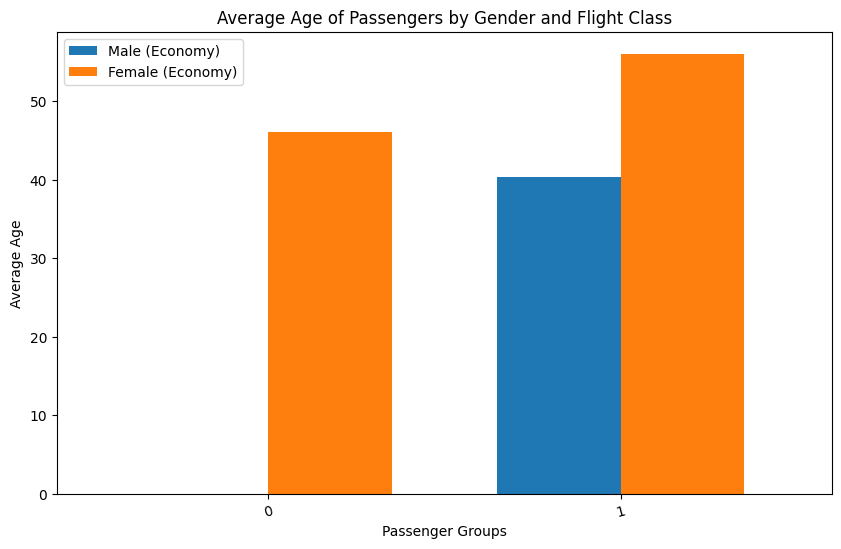

In [25]:
# Create a grouped bar chart
grouped_data.plot(kind='bar', width=0.7, figsize=(10, 6))
# Customize the plot
plt.xlabel('Passenger Groups')
plt.ylabel('Average Age')
plt.title('Average Age of Passengers by Gender and Flight Class')
plt.xticks(rotation=15)
plt.legend(title=None, labels=['Male (Economy)', 'Female (Economy)', 'Male (Business)', 'Female (Business)'])

# Show the plot
plt.show()

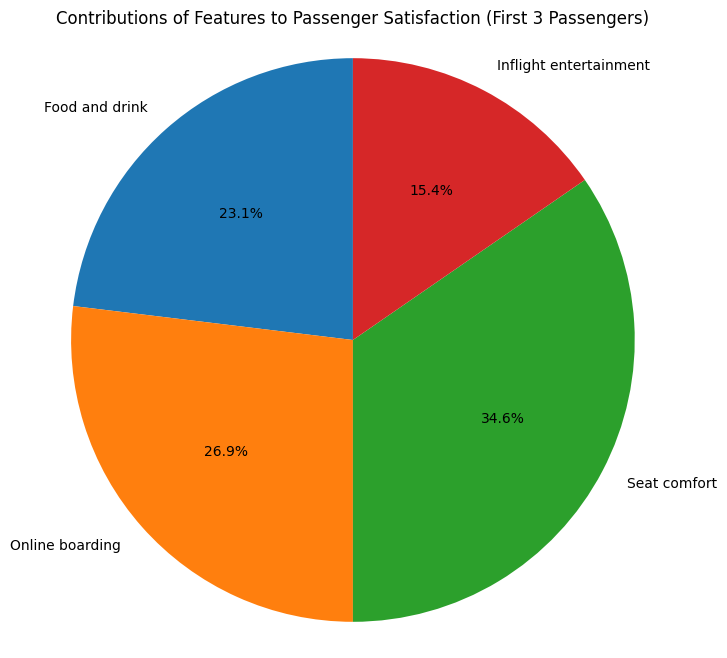

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into a DataFrame called 'df'

# Filter the data for the first 3 passengers from the aviation industry
first_3_passengers = df[(df['Type of Travel_Business travel'] == 1) & (df['Type of Travel_Personal Travel'] == 0)].head(3)

# Calculate the sum of satisfaction ratings for each feature
satisfaction_sum = first_3_passengers[['Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment']].sum()

# Labels for the pie chart
labels = satisfaction_sum.index

# Data for the pie chart
data = satisfaction_sum.values

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Contributions of Features to Passenger Satisfaction (First 3 Passengers)')

# Show the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [27]:
first_3_passengers = df[(df['Type of Travel_Business travel'] == 1) & (df['Type of Travel_Personal Travel'] == 0)].head()
satisfaction_sum = first_3_passengers[['Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment']].sum()

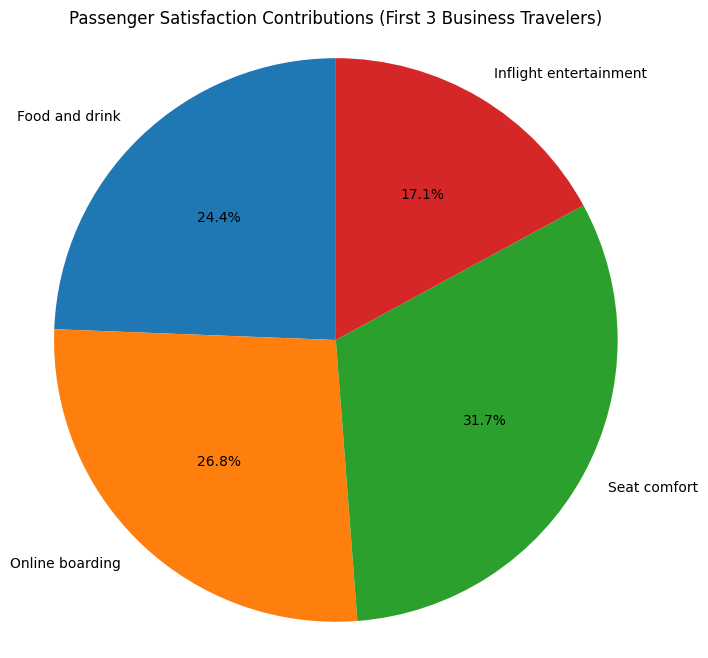

In [28]:
# Create a pie chart
satisfaction_sum.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90)
plt.title('Passenger Satisfaction Contributions (First 3 Business Travelers)')

# Show the pie chart
plt.axis('equal')
plt.show()
